# Plot fig. 7.8: 1850-1900 baseline

Theme Song: Hells Bells<br>
Artist: AC/DC<br>
Album: Back In Black<br>
Released: 1980

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as pl
import os
from matplotlib import gridspec, rc
from matplotlib.lines import Line2D
import matplotlib.patches as mp
from netCDF4 import Dataset
import warnings
from matplotlib.ticker import AutoMinorLocator

from ar6.utils.h5 import *

In [2]:
# TODO - sort out figure sizing

pl.rcParams['figure.figsize'] = (9/2.54, 9/2.54)
pl.rcParams['font.size'] = 9
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.direction'] = 'out'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.minor.visible'] = True
pl.rcParams['ytick.right'] = True
pl.rcParams['xtick.top'] = True
pl.rcParams['figure.dpi'] = 150

In [3]:
results = load_dict_from_hdf5('../data_output_large/twolayer_AR6-historical.h5')

In [4]:
results.keys()

dict_keys(['AR6-historical', 'AR6-historical_climuncert', 'remove_aerosol', 'remove_aerosol-cloud_interactions', 'remove_aerosol-cloud_interactions_climuncert', 'remove_aerosol-radiation_interactions', 'remove_aerosol-radiation_interactions_climuncert', 'remove_aerosol_climuncert', 'remove_albedo', 'remove_albedo_climuncert', 'remove_anthro', 'remove_anthro_climuncert', 'remove_bc_on_snow', 'remove_bc_on_snow_climuncert', 'remove_ch4', 'remove_ch4_climuncert', 'remove_co2', 'remove_co2_climuncert', 'remove_contrails', 'remove_contrails_climuncert', 'remove_h2o_stratospheric', 'remove_h2o_stratospheric_climuncert', 'remove_land_use', 'remove_land_use_climuncert', 'remove_n2o', 'remove_n2o_climuncert', 'remove_natural', 'remove_natural_climuncert', 'remove_o3', 'remove_o3_climuncert', 'remove_other_wmghg', 'remove_other_wmghg_climuncert', 'remove_solar', 'remove_solar_climuncert', 'remove_volcanic', 'remove_volcanic_climuncert', 'remove_wmghgs', 'remove_wmghgs_climuncert'])

In [5]:
AR6_forc = {}
forcings = ['co2', 'ch4', 'n2o', 'other_wmghg', 'o3', 'h2o_stratospheric',
            'contrails', 'aerosol-radiation_interactions', 'aerosol-cloud_interactions', 
            'bc_on_snow', 'land_use', 'volcanic', 'solar', 'aerosol', 'anthro', 'natural', 'wmghgs']
for forcing in forcings:
    AR6_forc[forcing] = np.zeros(5)
    AR6_forc[forcing] = np.percentile(        
        (results['AR6-historical_climuncert']['surface_temperature'] - results['AR6-historical_climuncert']['surface_temperature'][100:151].mean())-
        (results['remove_%s_climuncert' % forcing]['surface_temperature'] - results['remove_%s_climuncert' % forcing]['surface_temperature'][100:151].mean()),
        (5,16,50,84,95), axis=1
    )    
# aggregated categories
other_anth = (
    (
        (results['AR6-historical_climuncert']['surface_temperature'] - results['AR6-historical_climuncert']['surface_temperature'][100:151].mean())-
        (results['remove_h2o_stratospheric_climuncert']['surface_temperature'] - results['remove_h2o_stratospheric_climuncert']['surface_temperature'][100:151].mean())
    ) +
    (
        (results['AR6-historical_climuncert']['surface_temperature'] - results['AR6-historical_climuncert']['surface_temperature'][100:151].mean())-
        (results['remove_contrails_climuncert']['surface_temperature'] - results['remove_contrails_climuncert']['surface_temperature'][100:151].mean())
    ) +
    (
        (results['AR6-historical_climuncert']['surface_temperature'] - results['AR6-historical_climuncert']['surface_temperature'][100:151].mean())-
        (results['remove_land_use_climuncert']['surface_temperature'] - results['remove_land_use_climuncert']['surface_temperature'][100:151].mean())
    ) +
    (
        (results['AR6-historical_climuncert']['surface_temperature'] - results['AR6-historical_climuncert']['surface_temperature'][100:151].mean())-
        (results['remove_bc_on_snow_climuncert']['surface_temperature'] - results['remove_bc_on_snow_climuncert']['surface_temperature'][100:151].mean())
    )
)
AR6_forc['other_anth'] = np.percentile(other_anth, (5,16,50,84,95), axis=1)

other_anth_chapter3 = (
    (
        (results['AR6-historical_climuncert']['surface_temperature'] - results['AR6-historical_climuncert']['surface_temperature'][100:151].mean())-
        (results['remove_o3_climuncert']['surface_temperature'] - results['remove_o3_climuncert']['surface_temperature'][100:151].mean())
    ) +
    (
        (results['AR6-historical_climuncert']['surface_temperature'] - results['AR6-historical_climuncert']['surface_temperature'][100:151].mean())-
        (results['remove_h2o_stratospheric_climuncert']['surface_temperature'] - results['remove_h2o_stratospheric_climuncert']['surface_temperature'][100:151].mean())
    ) +
    (
        (results['AR6-historical_climuncert']['surface_temperature'] - results['AR6-historical_climuncert']['surface_temperature'][100:151].mean())-
        (results['remove_contrails_climuncert']['surface_temperature'] - results['remove_contrails_climuncert']['surface_temperature'][100:151].mean())
    ) +
    (
        (results['AR6-historical_climuncert']['surface_temperature'] - results['AR6-historical_climuncert']['surface_temperature'][100:151].mean())-
        (results['remove_aerosol_climuncert']['surface_temperature'] - results['remove_aerosol_climuncert']['surface_temperature'][100:151].mean())
    ) +
    (
        (results['AR6-historical_climuncert']['surface_temperature'] - results['AR6-historical_climuncert']['surface_temperature'][100:151].mean())-
        (results['remove_land_use_climuncert']['surface_temperature'] - results['remove_land_use_climuncert']['surface_temperature'][100:151].mean())
    ) +
    (
        (results['AR6-historical_climuncert']['surface_temperature'] - results['AR6-historical_climuncert']['surface_temperature'][100:151].mean())-
        (results['remove_bc_on_snow_climuncert']['surface_temperature'] - results['remove_bc_on_snow_climuncert']['surface_temperature'][100:151].mean())
    )
)
AR6_forc['aerosols_o3_luc_other_anth'] = np.percentile(other_anth_chapter3, (5,16,50,84,95), axis=1)

AR6_forc['total'] = np.percentile(results['AR6-historical_climuncert']['surface_temperature'] - results['AR6-historical_climuncert']['surface_temperature'][100:151].mean(), (5,16,50,84,95), axis=1)

In [6]:
colors = {
    'co2': '#7f0089',
    'ch4': '#ad5e00',
    'n2o': '#008e83',
    'other_wmghg': '#0070c0',
    'aerosol': '#66665f',
    'o3': '#e5da47',
    'other_anth': '#c0f080',
    'anthro' : '#000000',
    'volcanic': '#006000',
    'solar': '#d0a070',
    'total': '#000000'
}

In [7]:
AR6_forc['co2'][0].shape

(270,)

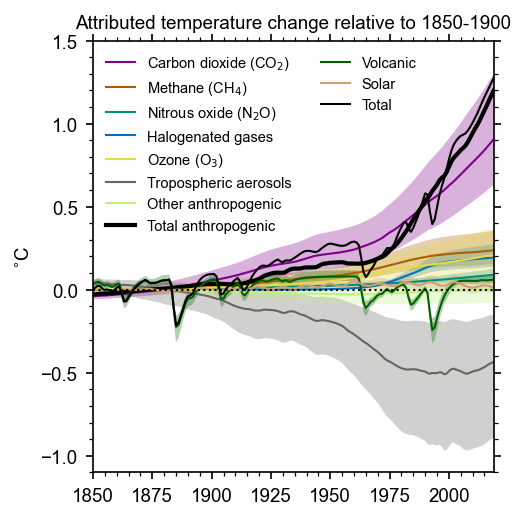

In [8]:
fig, ax = pl.subplots()

year = np.arange(1750, 2020)

for specie in ['co2','ch4','n2o','other_wmghg','o3','aerosol','other_anth','volcanic','solar']:
    ax.fill_between(year, AR6_forc[specie][0], AR6_forc[specie][4], color=colors[specie], alpha=0.3, lw=0)

ax.plot(year, AR6_forc['co2'][2], label='Carbon dioxide (CO$_2$)', color=colors['co2'], lw=1)
ax.plot(year, AR6_forc['ch4'][2], label='Methane (CH$_4$)', color=colors['ch4'], lw=1)
ax.plot(year, AR6_forc['n2o'][2], label='Nitrous oxide (N$_2$O)', color=colors['n2o'], lw=1)
ax.plot(year, AR6_forc['other_wmghg'][2], label='Halogenated gases', color=colors['other_wmghg'], lw=1)
ax.plot(year, AR6_forc['o3'][2], label='Ozone (O$_3$)', color=colors['o3'], lw=1)
ax.plot(year, AR6_forc['aerosol'][2], label='Tropospheric aerosols', color=colors['aerosol'], lw=1)
ax.plot(year, AR6_forc['other_anth'][2], label='Other anthropogenic', color=colors['other_anth'], lw=1)
ax.plot(year, AR6_forc['anthro'][2], color='k', lw=2, label='Total anthropogenic')
ax.plot(year, AR6_forc['volcanic'][2], label='Volcanic', color=colors['volcanic'], lw=1)
ax.plot(year, AR6_forc['solar'][2], label='Solar', color=colors['solar'], lw=1)
ax.plot(year, AR6_forc['total'][2], color=colors['total'], lw=1, label='Total')
ax.plot(0, 0, color='None', lw=0, label='\n')
ax.plot(0, 0, color='None', lw=0, label='\n')
ax.plot(0, 0, color='None', lw=0, label='\n')
ax.plot(0, 0, color='None', lw=0, label='\n')


ax.axhline(0, color='k', ls=':', lw=1)
ax.set_xlim(1850,2019)
ax.set_ylim(-1.1, 1.5)

ax.legend(ncol=2, fontsize=7, frameon=False)

ax.set_title('Attributed temperature change relative to 1850-1900', fontsize=9)
ax.set_ylabel('$^{\circ}$C')

ticklabels = ax.get_xticklabels()
ticklabels = ax.get_yticklabels()
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

pl.tight_layout()
pl.savefig('../figures/fig7.8_1850-1900.png')
pl.savefig('../figures/fig7.8_1850-1900.pdf')

## Save data into a csv file

requested by Benoît Tournadre

In [9]:
csv_output = (
    [
        year, 
        AR6_forc['co2'][0], AR6_forc['co2'][2], AR6_forc['co2'][4],
        AR6_forc['ch4'][0], AR6_forc['ch4'][2], AR6_forc['ch4'][4], 
        AR6_forc['n2o'][0], AR6_forc['n2o'][2], AR6_forc['n2o'][4], 
        AR6_forc['other_wmghg'][0], AR6_forc['other_wmghg'][2], AR6_forc['other_wmghg'][4], 
        AR6_forc['o3'][0], AR6_forc['o3'][2], AR6_forc['o3'][4], 
        AR6_forc['aerosol'][0], AR6_forc['aerosol'][2], AR6_forc['aerosol'][4], 
        AR6_forc['other_anth'][0], AR6_forc['other_anth'][2], AR6_forc['other_anth'][4], 
        AR6_forc['anthro'][0], AR6_forc['anthro'][2], AR6_forc['anthro'][4], 
        AR6_forc['volcanic'][0], AR6_forc['volcanic'][2], AR6_forc['volcanic'][4], 
        AR6_forc['solar'][0], AR6_forc['solar'][2], AR6_forc['solar'][4], 
        AR6_forc['total'][0], AR6_forc['total'][2], AR6_forc['total'][4], 
    ]
)

In [10]:
df_out = pd.DataFrame(
    np.array(csv_output).T,
    columns = [
        'year',
        'CO2_p05',
        'CO2_best',
        'CO2_p95',
        'CH4_p05',
        'CH4_best',
        'CH4_p95',
        'N2O_p05',
        'N2O_best',
        'N2O_p95',
        'otherGHG_p05',
        'otherGHG_best',
        'otherGHG_p95',
        'O3_p05',
        'O3_best',
        'O3_p95',
        'aerosol_p05',
        'aerosol_best',
        'aerosol_p95',
        'otheranthro_p05',
        'otheranthro_best',
        'otheranthro_p95',
        'anthro_p05',
        'anthro_best',
        'anthro_p95',
        'volcanic_p05',
        'volcanic_best',
        'volcanic_p95',
        'solar_p05',
        'solar_best',
        'solar_p95',
        'total_p05',
        'total_best',
        'total_p95',
    ]
)

In [11]:
df_out.to_csv('../data_output/fig7.8_1850-1900.csv', index=False)